### Contents:
5. Customer Profiling. Create a profiling variable based on:
- 5.1 Customer Profiling: Age
- 5.2 Customer Profiling: Income
- 5.3 Customer Profiling: Certain goods in the “department_id” column
- 5.4 Customer Profiling: Number of dependants
- 5.5 Profiling the Ordering Time

### 1. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path

path = r'C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis'

In [3]:
# Import data
http://localhost:8888/notebooks/Documents/04-2023%20Instacart%20Basket%20Analysis/03%20Scripts/4.10%20Coding%20Etiquette%20%26%20Excel%20Reporting%20Part%201%20(5.1%20-%205.2).ipynb#
df_project_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
df_project_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,dependants_number,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

### 5. Customer Profiling

### 5.1 Customer Profiling: Age

In [6]:
df_project_all['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [7]:
# Create new a variable (age_group) and assign age to age_group variable using for loop

age_group = []

for value in df_project_all['age']:
    if value < 30:
        age_group.append('Less than 30 years')
    elif value >= 30 and value < 40:
        age_group.append('30-39 years')
    elif value >= 40 and value < 50:
        age_group.append('40-49 years')
    elif value >=50 and value < 60:
        age_group.append('50-59')
    elif value >= 60 and value < 70:
        age_group.append('60-69 years')
    else:
        age_group.append('70+ years')

In [8]:
# Insert age_group as column in df_project_all

df_project_all['age_group'] = age_group

In [9]:
df_project_all['age_group'].value_counts(dropna = False)

Less than 30 years    6090441
70+ years             6079991
40-49 years           5109237
30-39 years           5073751
50-59                 5064175
60-69 years           4987264
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Age Group')

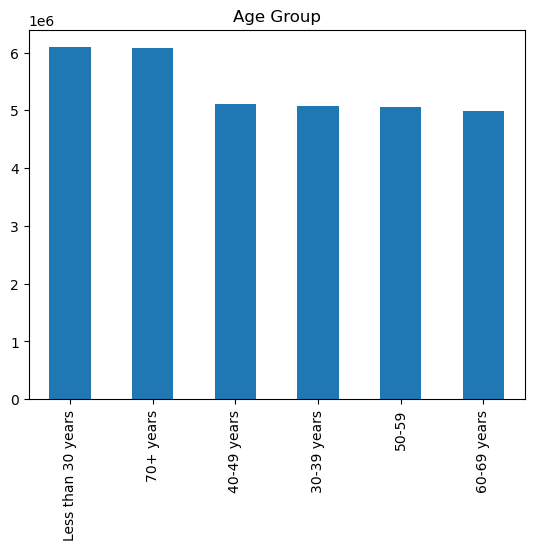

In [10]:
bar_age_profile = df_project_all['age_group'].value_counts().plot.bar()
plt.title('Age Group')

Text(0.5, 1.0, 'Age Group')

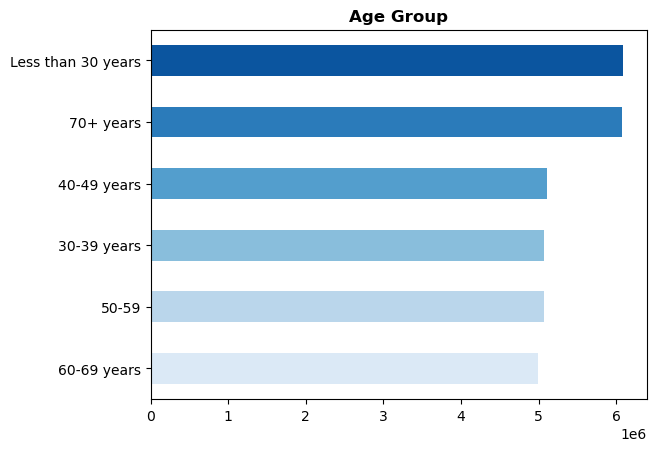

In [11]:
bar_age_profile2 = df_project_all['age_group'].value_counts().sort_values().plot.barh(color = sns.color_palette('Blues', 6))
plt.title('Age Group', fontweight = 'bold')

#### Observation: The majority of the customers come from the age group below 30 years and over 70 years

In [12]:
df_project_all.groupby('age_group').agg({'prices' : ['mean', 'max', 'min', 'sum']})

prices                         
                        mean   max  min           sum
age_group                                            
30-39 years         7.788828  25.0  1.0  3.951857e+07
40-49 years         7.799132  25.0  1.0  3.984761e+07
50-59               7.784795  25.0  1.0  3.942357e+07
60-69 years         7.799306  25.0  1.0  3.889720e+07
70+ years           7.791973  25.0  1.0  4.737512e+07
Less than 30 years  7.783186  25.0  1.0  4.740304e+07

#### Observation: I don't see a big difference in "average" price across groups, but from the "sum" I can see that customers under 30 and over 70 years have contributed the highest revenue since they are also the majority of customers that Instacart has based on the bar chart above

In [13]:
# Create a crosstab between the 'age_group' and 'loyalty_flag' column

crosstab_age_loyalty = pd.crosstab(df_project_all['age_group'], df_project_all['loyalty_flag'], dropna = False)
crosstab_age_loyalty 

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
30-39 years,1606129,965545,2502077
40-49 years,1632365,978759,2498113
50-59,1617569,983689,2462917
60-69 years,1586126,973767,2427371
70+ years,1928647,1168959,2982385
Less than 30 years,1913257,1173271,3003913


#### Observation: All categories from new customers to loyal customers are led by customers under 30 years and over 70 years

In [14]:
# Reapply regional segmentation as it hasn't been saved

# Check the "state" column
df_project_all['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [15]:
# Assign states to region variable using for loop

region = []
for value in df_project_all['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region.append('West')
    else:
        region.append('South')

In [16]:
# Insert region as column in df_project_all

df_project_all['region'] = region

In [17]:
df_project_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [18]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [19]:
# Create a crosstab between the 'region' and 'age_group' column

crosstab_age_region = pd.crosstab(df_project_all['region'], df_project_all['age_group'], dropna = False)
crosstab_age_region

age_group,30-39 years,40-49 years,50-59,60-69 years,70+ years,Less than 30 years
region,,,,,,
Midwest,1180424,1227062,1199596,1161370,1408168,1420705
Northeast,888917,900208,890071,884533,1088570,1070437
South,1723110,1677004,1653555,1664412,2021171,2052633
West,1281300,1304963,1320953,1276949,1562082,1546666


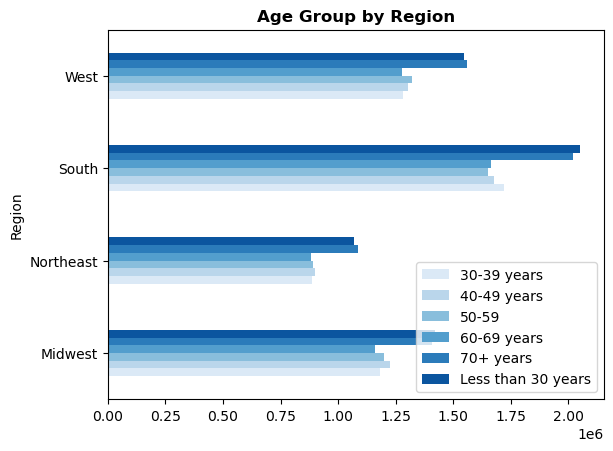

In [20]:
bar_age_region = crosstab_age_region.plot.barh(color = sns.color_palette('Blues', 6))
plt.ylabel('Region')
plt.legend()
plt.title('Age Group by Region', fontweight = 'bold')
plt.show()

#### Observation: All regions are also led by customers under 30 and over 70 years with the majority living in the Southern US region

### 5.2 Customer Profiling: Income

In [21]:
df_project_all['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [22]:
# Create a new variable (income_group) and assign income to income_group variable using for loop (separated by quartiles)

income_group = []

for value in df_project_all['income']:
    if value < 6.700400e+04:
        income_group.append('Low-income')
    elif value >= 6.700400e+04 and value < 9.661800e+04:
        income_group.append('Moderate-income')
    elif value >= 9.661800e+04 and value < 1.279120e+05:
        income_group.append('High-income')
    else:
        income_group.append('Wealthy')

In [23]:
# Insert income_group as column in df_project_all

df_project_all['income_group'] = income_group

In [24]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [25]:
df_project_all['income_group'].value_counts(dropna = False)

Wealthy            8101288
Low-income         8101214
Moderate-income    8101207
High-income        8101150
Name: income_group, dtype: int64

#### Observation: Looks like the income groups are evenly spread.

In [26]:
df_project_all.groupby('income_group').agg({'prices' : ['mean', 'max', 'min', 'sum']})

prices                         
                     mean   max  min           sum
income_group                                      
High-income      7.965269  25.0  1.0  6.452784e+07
Low-income       7.284196  25.0  1.0  5.901083e+07
Moderate-income  7.957462  25.0  1.0  6.446505e+07
Wealthy          7.956931  25.0  1.0  6.446139e+07

#### Observation: There is no significant difference in income groups: moderate, high, and wealthy in terms of income contribution made to Instacart

In [27]:
# Create a crosstab between the 'income_group' and 'age_group' column

crosstab_income_age = pd.crosstab(df_project_all['income_group'], df_project_all['age_group'], dropna = False)
crosstab_income_age

age_group,30-39 years,40-49 years,50-59,60-69 years,70+ years,Less than 30 years
income_group,,,,,,
High-income,346749,1673885,1786167,1727402,2159887,407060
Low-income,2347945,824157,691507,654404,791375,2791826
Moderate-income,2321798,826032,650851,664150,815754,2822622
Wealthy,57259,1785163,1935650,1941308,2312975,68933


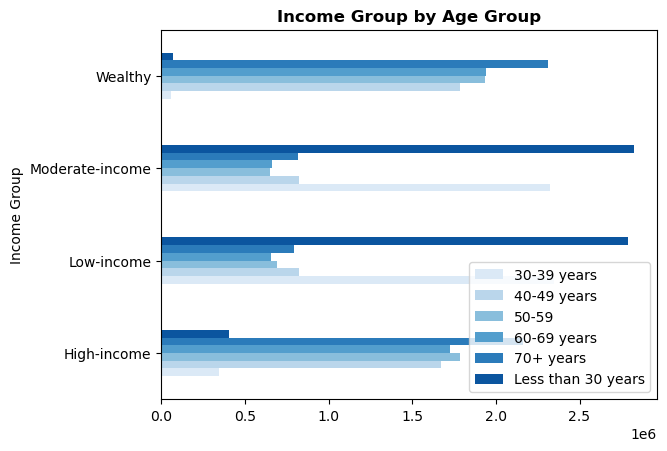

In [28]:
# Creating a bar chart of income group divided by age group

bar_age_income = crosstab_income_age.plot.barh(color = sns.color_palette('Blues', 6))
plt.ylabel('Income Group')
plt.legend()
plt.title('Income Group by Age Group', fontweight = 'bold')
plt.show()

#### Observation: The majority of low-moderate income group come from the age group < 30 years and 30 - 39 years (I can say they are still young to adulthood). In contrast, people in the high-to-wealthy bracket come from the age group 70+ year olds. This makes sense since older people may already have their own businesses, pensions, etc. which brought them to financial stability.

In [33]:
# Saving new dataframe to pickle

df_project_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'project_all.pkl'))

In [34]:
# Exporting bar_age_profile2 

bar_age_profile2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_profile.png'))

In [35]:
# Exporting bar_age_region 

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [36]:
# Exporting bar_age_income

bar_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_income.png'))

In [ ]:
 # 5.3 and 5.4 will be continued on the next notebook